# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Sinta Siti Nuriah
- Email: sinta@sttcipasung.ac.id
- Id Dicoding: stnrhsinta

## Persiapan

### Menyiapkan library yang dibutuhkan

In [51]:
!pip install pipreqs

In [52]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
!pipreqs "C:\Users\Sinta\Documents\Larskar AI\Submission\Data Science\performance-education/" --scan-notebooks

### Menyiapkan data yang akan diguankan

In [54]:
df = pd.read_csv('./dataset/data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Dataset Memiliki 37 kolom yang saling berkaitan satu sama lain, dalam menentukan mahasiswa dropout

## Data Understanding

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Penjelasan sebagian kolom yang akan digunakan untuk prediksi
| Kolom                               | Deskripsi                                                                 |
|------------------------------------|---------------------------------------------------------------------------|
| `Application_mode`                 | Jalur pendaftaran mahasiswa (numerik yang merepresentasikan mode tertentu) |
| `Gender`                           | Jenis kelamin (1 = Laki-laki, 0 = Perempuan)                             |
| `Age_at_enrollment`               | Usia mahasiswa saat mendaftar (dalam tahun)                              |
| `Debtor`                           | Status hutang pendidikan (1 = Ya, 0 = Tidak)                              |
| `Scholarship_holder`              | Status penerima beasiswa (1 = Ya, 0 = Tidak)                              |
| `Tuition_fees_up_to_date`         | Apakah pembayaran SPP tepat waktu (1 = Ya, 0 = Tidak)                     |
| `Curricular_units_1st_sem_approved` | Jumlah mata kuliah yang lulus di semester 1                             |
| `Curricular_units_1st_sem_grade`  | Nilai rata-rata semester 1                                               |
| `Curricular_units_2nd_sem_approved` | Jumlah mata kuliah yang lulus di semester 2                             |
| `Curricular_units_2nd_sem_grade`  | Nilai rata-rata semester 2                                               |
| `Status`                           | Status akhir mahasiswa (1 = Graduate, 0 = Dropout, 2=Enroll)                        |

In [56]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### 1. Bivariate - EDA

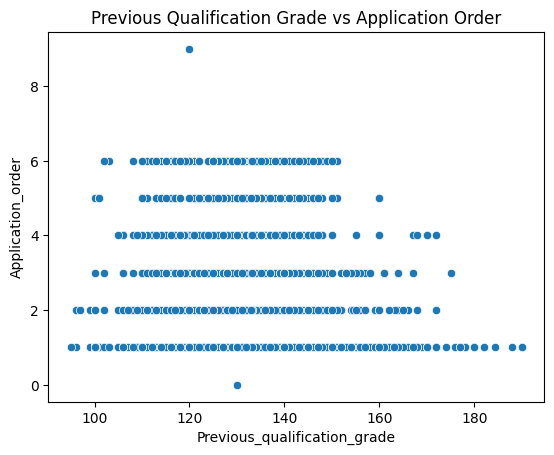

In [57]:
sns.scatterplot(data=df, x='Previous_qualification_grade', y='Application_order')
plt.title('Previous Qualification Grade vs Application Order')
plt.show()

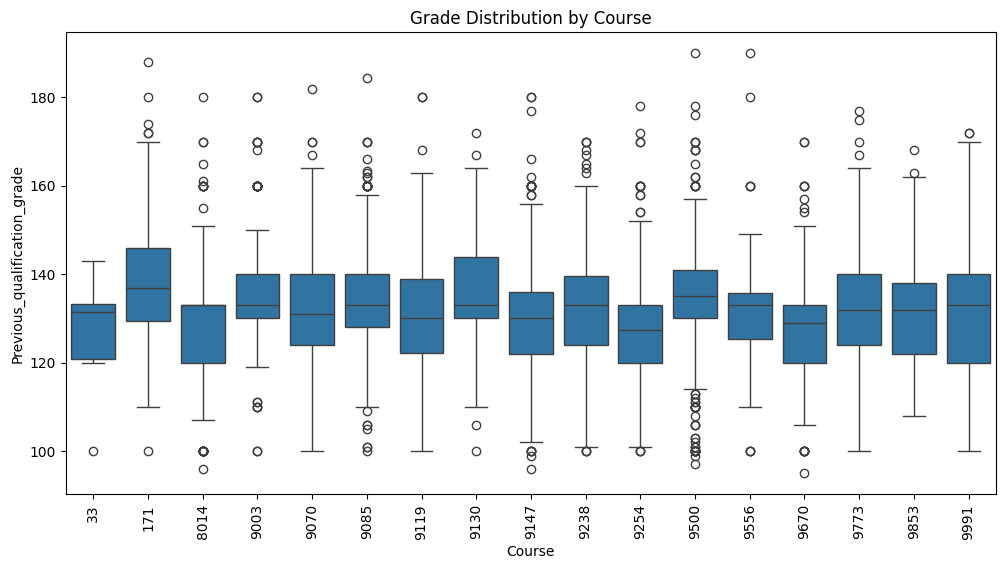

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Course', y='Previous_qualification_grade')
plt.xticks(rotation=90)
plt.title('Grade Distribution by Course')
plt.show()

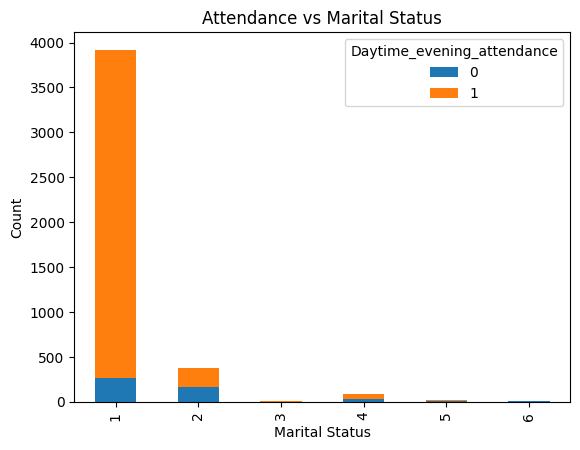

In [59]:
pd.crosstab(df['Marital_status'], df['Daytime_evening_attendance']).plot(kind='bar', stacked=True)
plt.title('Attendance vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### 2. Multivariate - EDA

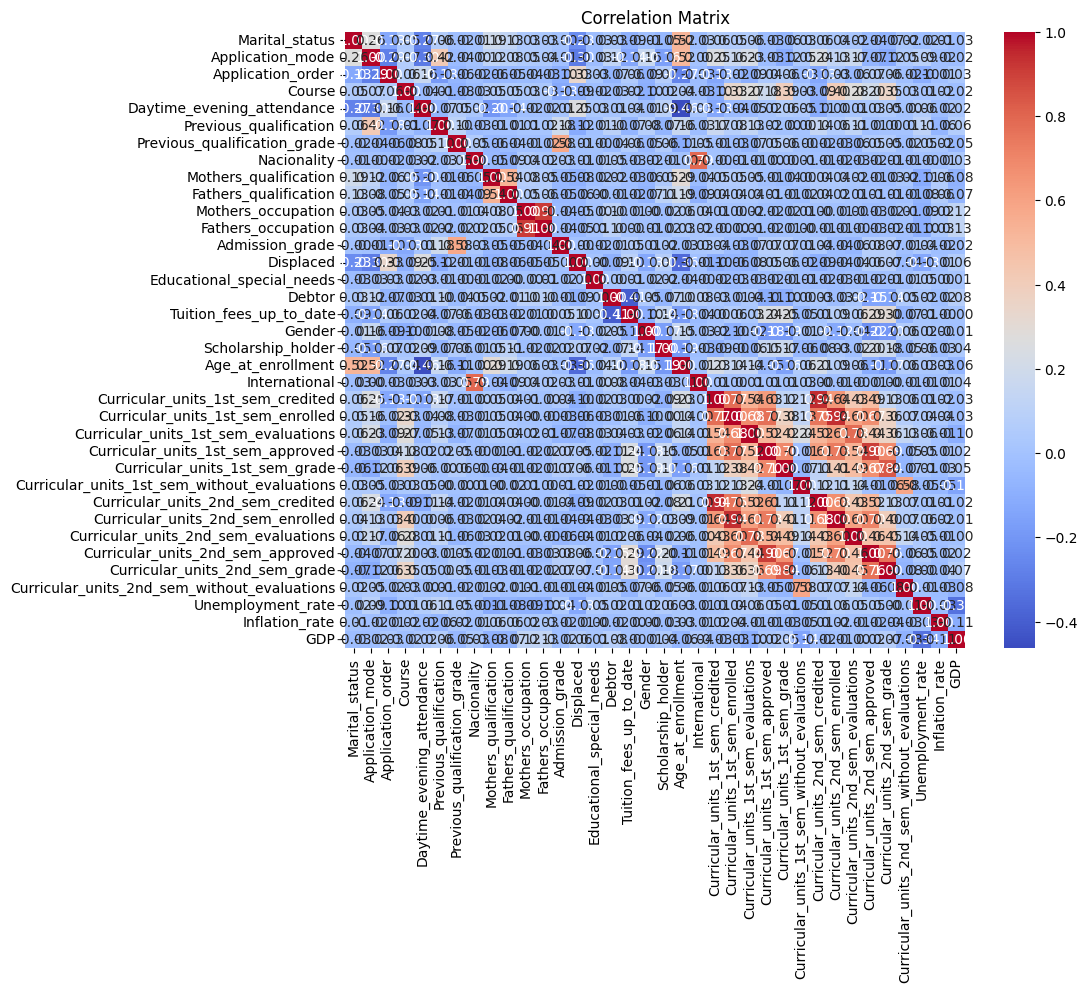

In [60]:
numerik_cols = df.select_dtypes(include=np.number)
corr = numerik_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

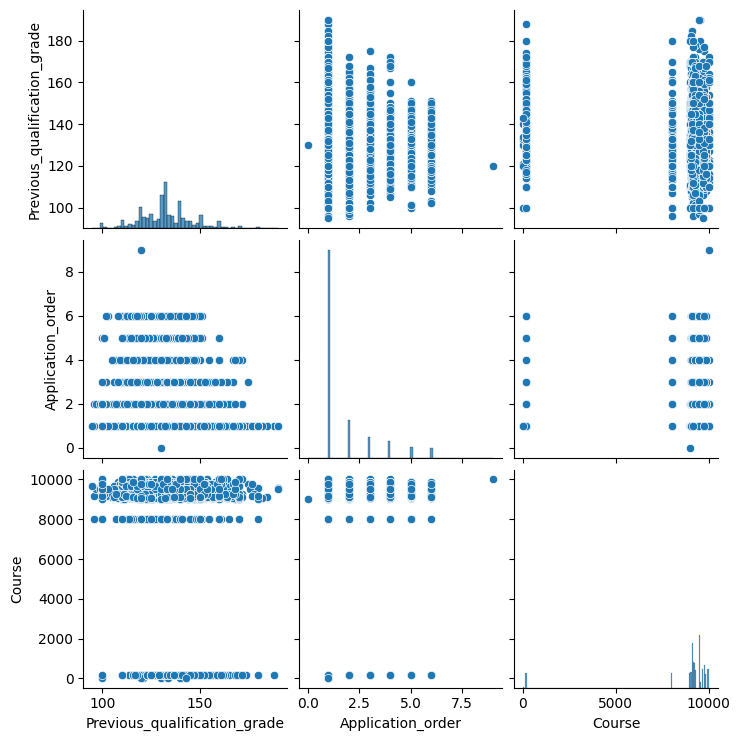

In [61]:
sns.pairplot(df[['Previous_qualification_grade', 'Application_order', 'Course']])
plt.show()


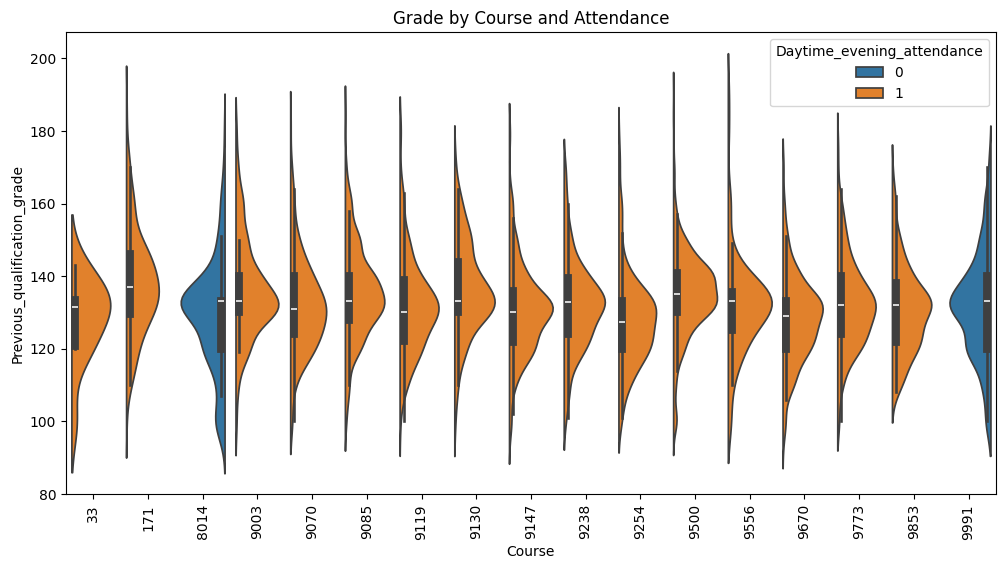

In [62]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Course', y='Previous_qualification_grade', hue='Daytime_evening_attendance', split=True)
plt.xticks(rotation=90)
plt.title('Grade by Course and Attendance')
plt.show()


### 3. Pengecekan Missing Value, Duplicated dan Outliers

In [63]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [64]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Dataset ini tidak memiliki missing values

In [65]:
df.duplicated().sum()

0

Dataset ini titak memiliki data yang duplikat

In [66]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Contoh pemakaian:
outliers_iqr = detect_outliers_iqr(df, 'Previous_qualification_grade')
print(outliers_iqr)


      Marital_status  Application_mode  Application_order  Course  \
4                  2                39                  1    8014   
53                 1                 1                  3    9130   
139                1                18                  1    9500   
142                1                51                  1    9147   
166                3                39                  1    9003   
...              ...               ...                ...     ...   
4389               1                 1                  1    9238   
4394               1                 1                  4    9500   
4402               1                18                  2    9853   
4408               2                39                  1    9773   
4422               1                 1                  1    9147   

      Daytime_evening_attendance  Previous_qualification  \
4                              0                       1   
53                             1                   

Dataset ini memiliki outliers dan perlu diatasi

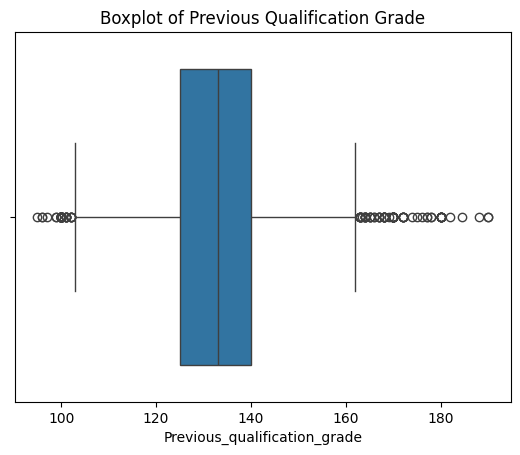

In [67]:
sns.boxplot(x=df['Previous_qualification_grade'])
plt.title('Boxplot of Previous Qualification Grade')
plt.show()

## Data Preparation / Preprocessing

### 1. Mengatasi Outliers

In [68]:
df_clean = df[~df.index.isin(outliers_iqr.index)]

In [69]:
df.shape

(4424, 37)

In [70]:
df_clean.shape

(4245, 37)

In [71]:
df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

### 2. Encoding Data Kategorikal

In [72]:
df_clean = df_clean[df_clean['Status'].isin(['Graduate', 'Dropout'])].copy()
df_clean['Status'] = df_clean['Status'].map({'Graduate': 1, 'Dropout': 0})
df_clean['Status']

0       0
1       1
2       0
3       1
5       1
       ..
4418    1
4419    1
4420    0
4421    0
4423    1
Name: Status, Length: 3484, dtype: int64

### 3. Selection Feature 

In [73]:
correlation = df_clean.corr()['Status'].sort_values(ascending=False)
print(correlation)

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.654800
Curricular_units_2nd_sem_grade                  0.602695
Curricular_units_1st_sem_approved               0.556725
Curricular_units_1st_sem_grade                  0.520722
Tuition_fees_up_to_date                         0.441871
Scholarship_holder                              0.313294
Curricular_units_2nd_sem_enrolled               0.182358
Curricular_units_1st_sem_enrolled               0.159352
Admission_grade                                 0.136689
Displaced                                       0.127484
Previous_qualification_grade                    0.119525
Curricular_units_2nd_sem_evaluations            0.115061
Application_order                               0.094635
Daytime_evening_attendance                      0.087824
Curricular_units_1st_sem_evaluations            0.055559
GDP                                             0.051390
Curricular_units_2nd_sem_credit

In [74]:
# Pilih fitur dengan korelasi absolut di atas 0.3 (positif atau negatif)
selected_features = correlation[abs(correlation) > 0.2].drop('Status').index.tolist()

print("Fitur terpilih:", selected_features)

Fitur terpilih: ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Application_mode', 'Gender', 'Debtor', 'Age_at_enrollment']


Untuk mendapatkan selected feature yang saling berhubungan, pada tahap ini diambil data dengan korelasi lebih dari 0.2.

Fitur terpilih: ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Application_mode', 'Gender', 'Debtor', 'Age_at_enrollment']

In [75]:
df_clean[selected_features]

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Application_mode,Gender,Debtor,Age_at_enrollment
0,0,0.000000,0,0.000000,1,0,17,1,0,20
1,6,13.666667,6,14.000000,0,0,15,1,0,19
2,0,0.000000,0,0.000000,0,0,1,1,0,19
3,5,12.400000,6,13.428571,1,0,17,0,0,20
5,5,11.500000,5,11.857143,1,0,39,1,1,50
...,...,...,...,...,...,...,...,...,...,...
4418,7,13.142857,6,12.500000,1,0,44,1,0,20
4419,5,12.666667,5,13.600000,1,0,1,1,0,19
4420,2,11.000000,6,12.000000,0,0,1,0,1,18
4421,1,13.500000,7,14.912500,1,1,1,0,0,30


### 4. Splitting Data

In [76]:
X = df_clean[selected_features]
y = df_clean['Status']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train size: {X_train.shape} Test Size: {X_test.shape}" )

Train size: (2787, 10) Test Size: (697, 10)


### 5. Normalisasi/Standarisasi

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [26]:
# Simpan scaler
joblib.dump(scaler, 'scaler_1.joblib')
print("Scaler saved!")

Scaler saved!


### 6. SMOTE

In [78]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

c:\Users\Sinta\anaconda3\envs\laskarai\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


## Modeling

**Support Vector Classifier (SVC)** adalah bagian dari algoritma **Support Vector Machine (SVM)** yang digunakan untuk **klasifikasi data**. Tujuannya adalah mencari sebuah *hyperplane* (garis atau bidang pemisah) yang dapat **memisahkan dua kelas data dengan margin terbesar**.


In [79]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', random_state=42)

| Parameter      | Nilai         | Deskripsi                                                                 |
|----------------|---------------|---------------------------------------------------------------------------|
| `kernel`       | `'linear'`    | Menggunakan fungsi kernel linear untuk mencari hyperplane pemisah.       |
| `random_state` | `42`          | Menjamin hasil replikasi eksperimen yang konsis

## Evaluation

In [80]:
y_pred = model.predict(X_test_scaled)

In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8837876614060258
Confusion Matrix:
 [[223  51]
 [ 30 393]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85       274
           1       0.89      0.93      0.91       423

    accuracy                           0.88       697
   macro avg       0.88      0.87      0.88       697
weighted avg       0.88      0.88      0.88       697



In [36]:
joblib_file = "svm_model_1.joblib"
joblib.dump(model, joblib_file)

print(f"Model disimpan ke file {joblib_file}")

Model disimpan ke file svm_model_1.joblib


In [82]:
X_all = df_clean[selected_features]
X_all_scaled = scaler.fit_transform(X_all)
pred_all = model.predict(X_all_scaled)

In [83]:
df_clean['prediction'] = pred_all
df_clean

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,prediction
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,1,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,1,1
5,2,39,1,9991,0,19,133.1,1,37,37,...,5,17,5,11.500000,5,16.2,0.3,-0.92,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,1,44,1,9070,1,39,120.0,1,3,38,...,9,10,7,13.142857,1,16.2,0.3,-0.92,1,1
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,1,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,0


In [85]:
df_clean.to_csv('dataset/predicts_data.csv')